In [76]:
import os
import sys

import pandas as pd
import numpy as np
import math

from matplotlib import pyplot as plt

from scipy.integrate import cumtrapz
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve

In [2]:
os.chdir(r"C:\dengueredo")
#Load preprocessed dataframes
sj_train_features_processed = pd.read_csv('sj_training_data_imputed.csv')
iq_train_features_processed = pd.read_csv('iq_training_data_imputed.csv')

sj_train_labels_processed = pd.read_csv('sj_train_labels.csv')
iq_train_labels_processed = pd.read_csv('iq_train_labels.csv')

sj_test_features_processed = pd.read_csv('sj_testing_data.csv')
iq_test_features_processed = pd.read_csv('iq_testing_data.csv')

In [99]:
#Verify preprocessed dataframe loaded correctly
sj_train_features_processed

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,season,month
0,0.122600,0.103725,0.198483,0.177617,12.42,24.422857,24.592857,19.264286,26.65,22.75,...,12.42,14.012857,-270.521429,25.442857,6.900000,29.4,20.0,16.0,2,4
1,0.169900,0.142175,0.162357,0.155486,22.82,25.061429,25.292857,20.801429,27.75,23.25,...,22.82,15.372857,-270.778571,26.714286,6.371429,31.7,22.2,8.6,2,5
2,0.032250,0.172967,0.157200,0.170843,34.54,25.631429,25.728571,22.284286,27.35,24.15,...,34.54,16.848571,-270.850000,26.714286,6.485714,32.2,22.8,41.4,2,5
3,0.128633,0.245067,0.227557,0.235886,15.36,25.837143,26.078571,22.160000,28.25,23.85,...,15.36,16.672857,-270.721429,27.471429,6.771429,33.3,23.3,4.0,2,5
4,0.196200,0.262200,0.251200,0.247340,7.52,26.368571,26.514286,22.671429,28.75,24.35,...,7.52,17.210000,-270.135714,28.942857,9.371429,35.0,23.9,5.8,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,0.077850,-0.039900,0.310471,0.296243,27.19,23.808571,23.807143,18.945714,26.55,21.25,...,27.19,13.644286,-270.264286,25.042857,5.785714,30.0,21.1,1.8,1,3
932,-0.038000,-0.016833,0.119371,0.066386,3.82,24.931429,25.078571,20.085714,26.65,23.35,...,3.82,14.662857,-270.435714,26.242857,6.814286,30.6,22.2,0.5,2,4
933,-0.155200,-0.052750,0.137757,0.141214,16.96,24.310000,24.414286,19.582857,26.25,22.65,...,16.96,14.184286,-270.964286,25.000000,5.714286,29.4,21.7,30.7,2,4
934,0.001800,-0.031558,0.203900,0.209843,0.00,24.480000,24.628571,19.124286,26.55,22.75,...,0.00,13.858571,-270.364286,25.314286,6.242857,29.4,21.7,11.2,2,4


In [100]:
sj_test_features_processed

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,season,month
0,-0.01890,-0.018900,0.102729,0.091200,78.60,25.342857,25.400000,21.377143,27.95,23.25,...,78.60,15.918571,-270.021429,26.528571,7.057143,33.3,21.7,75.2,2,4
1,-0.01800,-0.012400,0.082043,0.072314,12.56,25.325714,25.407143,21.245714,27.65,23.55,...,12.56,15.791429,-270.578571,26.071429,5.557143,30.0,22.2,34.3,2,5
2,-0.00150,NaN,0.151083,0.091529,3.66,26.305714,26.207143,22.158571,29.05,23.25,...,3.66,16.674286,-268.721429,27.928571,7.785714,32.8,22.8,3.0,2,5
3,NaN,-0.019867,0.124329,0.125686,0.00,26.540000,26.578571,21.252857,29.85,23.75,...,0.00,15.775714,-268.807143,28.057143,6.271429,33.3,24.4,0.3,2,5
4,0.05680,0.039833,0.062267,0.075914,0.76,26.630000,26.521429,21.610000,29.15,24.15,...,0.76,16.137143,-269.607143,27.614286,7.085714,33.3,23.3,84.1,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,-0.08740,-0.016183,0.156343,0.105186,30.34,25.520000,25.735714,21.525714,28.15,23.25,...,30.34,15.985714,-269.835714,27.542857,7.942857,33.9,22.8,3.5,1,3
256,-0.20325,-0.077833,0.204171,0.178914,6.55,24.885714,25.007143,21.478571,28.35,22.75,...,6.55,15.881429,-270.321429,26.642857,6.642857,33.3,22.8,17.6,2,4
257,-0.11760,-0.008200,0.192700,0.170429,0.00,25.907143,26.178571,21.798571,28.35,24.35,...,0.00,16.212857,-269.978571,27.914286,8.114286,32.8,23.3,9.4,2,4
258,0.08275,0.031200,0.135014,0.074857,0.00,25.762857,25.914286,21.528571,27.75,24.15,...,0.00,15.965714,-270.107143,27.728571,6.942857,31.7,23.9,22.9,2,4


In [4]:
#Train-test-splitting for both cities for model optimization, using preprocessed features and labels
sj_train_X, sj_test_X, sj_train_y, sj_test_y = train_test_split(sj_train_features_processed, 
                                                                sj_train_labels_processed, 
                                                                test_size=0.2,
                                                               random_state=56)

iq_train_X, iq_test_X, iq_train_y, iq_test_y = train_test_split(iq_train_features_processed, 
                                                                iq_train_labels_processed, 
                                                                test_size=0.2,
                                                               random_state=58)

In [5]:
#Method to perform 10-fold RFECV and log the mean scores, feature importances, and the selected features
def perform_rfecv(X, y, estimator, cv=10, scoring='neg_mean_absolute_error', verbose=2):
    rfecv = RFECV(estimator=estimator, step=1, cv=cv, scoring=scoring, verbose=verbose)
    rfecv.fit(X, y.values.ravel())

    cv_results = rfecv.cv_results_
    mean_scores = cv_results['mean_test_score']

    print("\nMean score for each number of features:")
    for count, score in enumerate(mean_scores, start=1):
        print(f"Number of features: {count}, Mean CV Score: {score}")
    
    feature_importances = rfecv.estimator_.feature_importances_
    print("Features selected:", rfecv.support_)
    print("Feature ranking:", rfecv.ranking_)

    selected_features = X.columns[rfecv.support_]
    importances = {feature: importance for feature, importance in zip(selected_features, feature_importances)}

    print("\nFeature importances:")
    for feature, importance in sorted(importances.items(), key=lambda x: x[1], reverse=True):
        print(f"{feature}: {importance}")

    return rfecv

In [6]:
#Define the model to be used and then perform RFECV for each city
model = RandomForestRegressor()

print("RFECV for San Juan:")
sj_rfecv = perform_rfecv(sj_train_X, sj_train_y, model)

print("\nRFECV for Iquitos:")
iq_rfecv = perform_rfecv(iq_train_X, iq_train_y, model)

RFECV for SJ:
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with

Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.


In [7]:
#Function that returns a feature-selected dataframe based on RFECV results or user choice
def feature_selector(features, city):
    if city == 'sj':
        relevant_features_sj = ['reanalysis_specific_humidity_g_per_kg',  
                                'station_max_temp_c', 'month', 
                                'reanalysis_dew_point_temp_k']
        return features[relevant_features_sj]
    
    elif city == 'iq':
        relevant_features_iq = ['reanalysis_specific_humidity_g_per_kg', 'ndvi_se', 
                                'station_min_temp_c', 'reanalysis_dew_point_temp_k', 
                                'station_max_temp_c', 'month', 'reanalysis_tdtr_k']
        return features[relevant_features_iq]

In [8]:
#Select only the most important features as determined by RFECV or user choice
sj_train_relevant_features = feature_selector(sj_train_X, 'sj')
iq_train_relevant_features = feature_selector(iq_train_X, 'iq')

sj_test_relevant_features = feature_selector(sj_test_X, 'sj')
iq_test_relevant_features = feature_selector(iq_test_X, 'iq')

In [9]:
#Grid search, model creation, and evaluation function
def train_and_evaluate(X_train, y_train, X_test, y_test, model_type, param_grid):
    grid_search = GridSearchCV(model_type, param_grid, verbose=2, cv=10, 
                               scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train.values.ravel())
    
    best_params = grid_search.best_params_
    model = model_type.set_params(**best_params)
    model.fit(X_train, y_train.values.ravel())
    
    predicted = model.predict(X_test)
    mae = mean_absolute_error(y_test, predicted)
    mse = mean_absolute_error(y_test, predicted) ** 0.5
    
    return model, mae, mse, best_params

In [17]:
#Method to plot learning curve loss as a function of training samples
def plot_learning_curve(model, X, y, title='Learning Curve'):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=10, scoring='neg_mean_squared_error', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5))
    
    train_scores_mean = -train_scores.mean(axis=1)
    test_scores_std = test_scores.std(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)
    
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score (MSE)")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores.std(axis=1),
                     train_scores_mean + train_scores.std(axis=1), alpha=0.1, color="r")
    
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [12]:
#Random Forest Regression Model parameters
rfr_params = {
    'max_depth': [2, 5, 10, 20, 40],
    'n_estimators': [5, 20, 100],
    'max_features': [5, 9, 13, 19],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [2, 4, 8, 10]}

In [13]:
#Train and evaluate models for both cities, 
#returning the RFR model with the best score and its parameters
sj_rfr_model, sj_mae, sj_mse, sj_best_params = train_and_evaluate(sj_train_relevant_features, 
                                                                  sj_train_y, 
                                                  sj_test_relevant_features, sj_test_y, 
                                                  RandomForestRegressor(), rfr_params)

iq_rfr_model, iq_mae, iq_mse, iq_best_params = train_and_evaluate(iq_train_relevant_features, 
                                                                  iq_train_y, 
                                                  iq_test_relevant_features, iq_test_y, 
                                                  RandomForestRegressor(), rfr_params)
# Print model performance
print(f"\nSan Juan: MAE = {sj_mae}, MSE = {sj_mse}")
print(f"Iquitos: MAE = {iq_mae}, MSE = {iq_mse}")

print(f"\nSan Juan Best Params: ", sj_best_params)
print(f"Iquitos Best Params: ", iq_best_params)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits
Fitting 10 folds for each of 720 candidates, totalling 7200 fits

San Juan: MAE = 25.314893739901915, MSE = 5.031390835534635
Iquitos: MAE = 5.197817900104018, MSE = 2.2798723429402834

San Juan Best Params:  {'max_depth': 5, 'max_features': 13, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 5}
Iquitos Best Params:  {'max_depth': 20, 'max_features': 5, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 100}


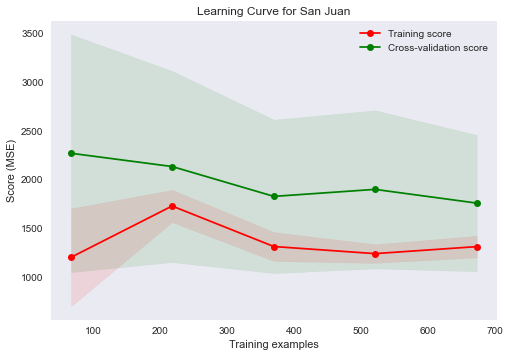

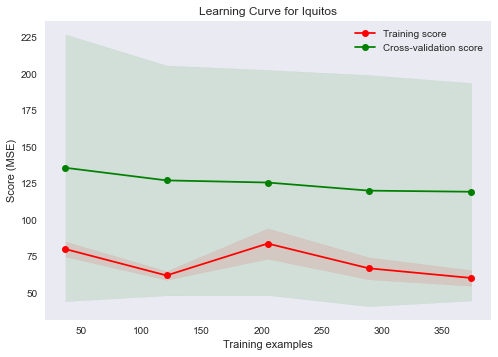

In [19]:
plot_learning_curve(RandomForestRegressor(**sj_best_params), 
                    sj_train_relevant_features, sj_train_y, 'Learning Curve for San Juan').show()

plot_learning_curve(RandomForestRegressor(**iq_best_params), 
                    iq_train_relevant_features, iq_train_y, 'Learning Curve for Iquitos').show()

In [21]:
#Combine training features and labels, as well as testing features and labels 
#to create full features and labels for submission prediction
sj_full_X = np.concatenate([sj_train_relevant_features, sj_test_relevant_features])
sj_full_y = np.concatenate([sj_train_y, sj_test_y])

iq_full_X = np.concatenate([iq_train_relevant_features, iq_test_relevant_features])
iq_full_y = np.concatenate([iq_train_y, iq_test_y])

#Fit models on full features and labels
sj_full_model = sj_rfr_model.fit(sj_full_X, sj_full_y)
iq_full_model = iq_rfr_model.fit(iq_full_X, iq_full_y)

#Select test columns and fill their NAs (using the mean) for final prediction,
#otherwise the required submission format will not match
sj_sub_prediction_features = feature_selector(sj_test_features_processed, 'sj')
sj_sub_prediction_features.fillna(sj_sub_prediction_features.mean(),inplace=True)

iq_sub_prediction_features = feature_selector(iq_test_features_processed, 'iq')
iq_sub_prediction_features.fillna(iq_sub_prediction_features.mean(),inplace=True)

#Generate submission predictions
sj_predicted_full_model_RF = sj_full_model.predict(sj_sub_prediction_features).astype(int)
iq_predicted_full_model_RF = iq_full_model.predict(iq_sub_prediction_features).astype(int)

#Read in submission format and fill in predictions by concatenating per-city results
submission = pd.read_csv('submission_format.csv', index_col=[0, 1, 2])
submission.reset_index()

submission.total_cases = np.concatenate([sj_predicted_full_model_RF, iq_predicted_full_model_RF])
submission.to_csv('DengueSimplified5.csv')

C:\Users\BOMBSH~1\AppData\Local\Temp/ipykernel_60964/1622687738.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  sj_full_model = sj_rfr_model.fit(sj_full_X, sj_full_y)
C:\Users\BOMBSH~1\AppData\Local\Temp/ipykernel_60964/1622687738.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  iq_full_model = iq_rfr_model.fit(iq_full_X, iq_full_y)
C:\Users\Bombshell\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\Bombshell\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has fe

In [37]:
#Load predictions for plotting
predicted_data = pd.read_csv('DengueSimplified5.csv')

sj_predicted_cases = predicted_data.loc[predicted_data['city'] =='sj']
iq_predicted_cases = predicted_data.loc[predicted_data['city'] =='iq']

#Create date column for x-axis plotting of total cases against years
sj_predicted_cases['date'] = pd.to_datetime(sj_predicted_cases['year'].astype(str) + 
                                            '-' + 
                                            (sj_predicted_cases['weekofyear']-1).astype(str) + 
                                            '-0', format='%Y-%U-%w')

iq_predicted_cases['date'] = pd.to_datetime(iq_predicted_cases['year'].astype(str) + 
                                            '-' + 
                                            (iq_predicted_cases['weekofyear']-1).astype(str) + 
                                            '-0', format='%Y-%U-%w')

sj_predicted_cases.set_index('date', inplace=True)
iq_predicted_cases.set_index('date', inplace=True)

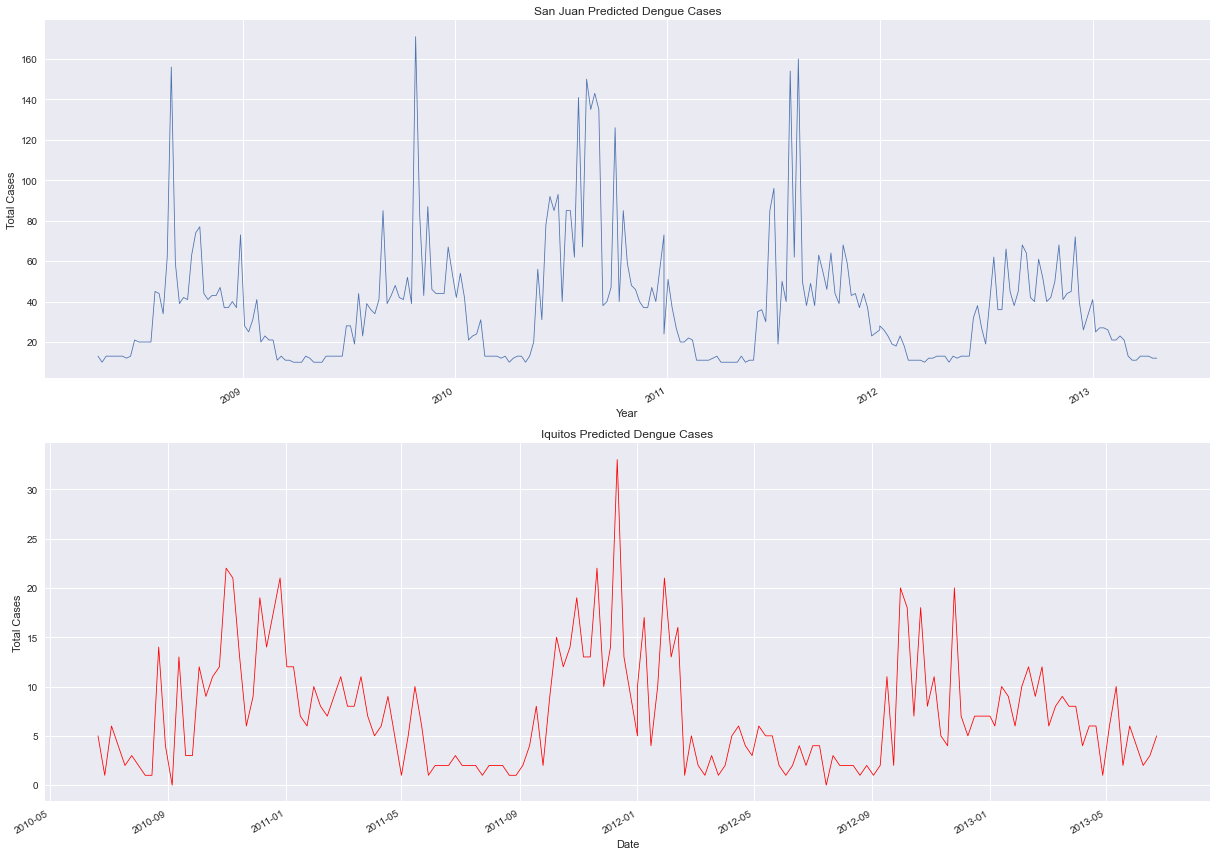

In [57]:
#Plot predicted total_cases for both cities
plt.figure(figsize=(17, 12))

#Plot for San Juan
plt.subplot(2, 1, 1)
sj_predicted_cases.total_cases.plot(lw=0.8)
plt.title('San Juan Predicted Dengue Cases')
plt.xlabel('Year')
plt.ylabel('Total Cases')

#Plot for Iquitos
plt.subplot(2, 1, 2)
iq_predicted_cases.total_cases.plot(lw=0.8, color='r')
plt.title('Iquitos Predicted Dengue Cases')
plt.xlabel('Date')
plt.ylabel('Total Cases')

plt.subplots_adjust(hspace=5.0)
plt.tight_layout()
plt.show()

In [61]:
#Load labels for projection plotting
train_w_preds_appended = pd.read_csv('dengue_labels_train.csv')

sj_train_w_preds_appended = train_w_preds_appended.loc[train_w_preds_appended['city'] =='sj']
iq_train_w_preds_appended = train_w_preds_appended.loc[train_w_preds_appended['city'] =='iq']

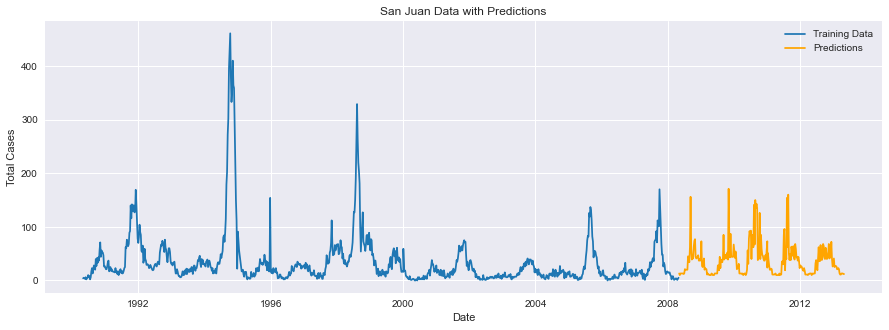

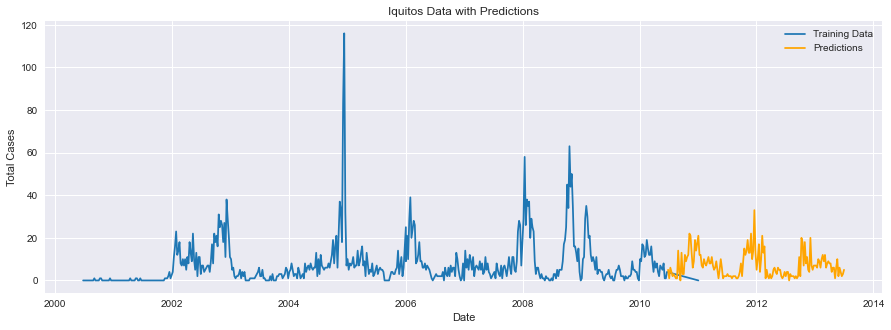

In [72]:
#Method to plot all training data with concatenated predictions
def plot_training_and_predictions(train_df, pred_df, city_name):
    #Ensure 'date' is not set as index
    train_df = train_df.reset_index(drop=True)
    pred_df = pred_df.reset_index(drop=True)

    train_df['date'] = pd.to_datetime(train_df['year'].astype(str) + 
                                      train_df['weekofyear'].astype(str) +
                                      '1', format='%Y%W%w')
    
    pred_df['date'] = pd.to_datetime(pred_df['year'].astype(str) + 
                                     pred_df['weekofyear'].astype(str) + 
                                     '1', format='%Y%W%w')

    train_df_sorted = train_df.sort_values('date')
    pred_df_sorted = pred_df.sort_values('date')

    plt.figure(figsize=(15, 5))
    plt.plot(train_df_sorted['date'], train_df_sorted['total_cases'], 
             label='Training Data', color='#1f77b4')

    plt.plot(pred_df_sorted['date'], pred_df_sorted['total_cases'], 
             label='Predictions', color='orange')

    plt.xlabel('Date')
    plt.ylabel('Total Cases')
    plt.title(f'{city_name} Data with Predictions')
    plt.legend()
    plt.show()

plot_training_and_predictions(sj_train_w_preds_appended, sj_predicted_cases, 'San Juan')
plot_training_and_predictions(iq_train_w_preds_appended, iq_predicted_cases, 'Iquitos')

In [ ]:
# Based on the submission result of 24.86 MAE, and the observation that the 
# evaluation MAE for San Juan (25.31) was much higher than Iquitos' (5.19), it is likely that
# the San Juan model contributes more heavily to the prediction error. This could be due to San Juan's 
# predictions pessimistic outlook on future cases of dengue. Perhaps performing additive outlier removal 
# on the target before training could yield more realistic results.